# Auto-MPG Veri Seti Analizi ve Modelleme
Bu notebook'ta Auto MPG veri setini kullanarak veri keşfi, analiz ve modelleme adımlarını gerçekleştireceğiz. Hedefimiz, bir aracın özelliklerine göre yakıt tüketimini (MPG) tahmin etmek. Veri setini inceleyerek başlayalım.

## Veri Seti Hikayesi
**Auto MPG veri seti**, araçların yakıt tüketimi (MPG - Miles Per Gallon) ile ilgili çeşitli özelliklerini içeren bir veri setidir. Bu veri seti, araçların çevresel etkilerini ve yakıt ekonomilerini analiz etmek için sıklıkla kullanılır. İlk olarak UCI Machine Learning Repository'de yayımlanan veri seti, aşağıdaki özellikleri içermektedir:
### Özellikler:
1. **MPG (Miles per Gallon)**: Aracın yakıt tüketim performansı (hedef değişken).
2. **Cylinders (Silindir Sayısı)**: Aracın motorundaki silindir sayısı.
3. **Displacement (Motor Hacmi)**: Motorun hacmi (inç³ cinsinden).
4. **Horsepower (Beygir Gücü)**: Aracın motor gücü.
5. **Weight (Ağırlık)**: Aracın toplam ağırlığı (pound cinsinden).
6. **Acceleration (İvme)**: Aracın 0-60 mil/saat hızlanma süresi (saniye cinsinden).
7. **Model Year (Model Yılı)**: Aracın üretim yılı.
8. **Origin (Menşei)**: Aracın üretildiği bölge:
   - 1: Amerika
   - 2: Avrupa
   - 3: Asya

### Veri Setinin Amacı:
Bu veri seti, araçların yakıt ekonomisini etkileyen faktörleri incelemek ve yeni bir aracın tahmini MPG değerini hesaplamak için kullanılabilir. Veri seti, hem regresyon hem de veri keşfi için uygundur. Şimdi veri setimizi daha detaylı inceleyerek başlayabiliriz.
## Veri Setini Yükleme ve Veriye İlk Bakış

In [114]:
from IPython.display import clear_output

!pip install ucimlrepo
clear_output()
print("İndirme başarılı!")

İndirme başarılı!


Drive'ı bağlayalım.

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
from ucimlrepo import fetch_ucirepo
auto_mpg = fetch_ucirepo(id=9)
X = auto_mpg.data.features # özellikler
y = auto_mpg.data.targets #  hedef değişken

In [117]:
print("X:", X.shape)
print("y:", y.shape)

X: (398, 7)
y: (398, 1)


X ve y olarak atadığımız verilerin birbiriyle ve kullanmak istediğimiz formata uyumlu olduğunu görüyoruz. İncelemeye daha detaylı devam etmek için birleştirerek bir dataframe oluşturup, ilk 5 satırını incelemeyle başlayabiliriz.

In [118]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


X ve y setlerini birleştirerek daha temiz ve yapılandırılmış bir form elde etmiş olduk ve veri setimiz oldukça temiz gözüküyor, biraz daha detaylandıralım.

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Veri setinde toplamda sadece 6 adet eksik değerimiz bulunuyor ve veri türleri de normal gözüküyor, bir de sayısal sütunların istatistiksel değerlerini inceleyelim.

In [120]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


Yüksek oranda bir sapmaya sahip olduğumuz için aykırı değer analizi de yapabiliriz veya direkt olarak normalizasyon (standardizasyon) da uygulayabiliriz. Burada verilerimiz nizami bir şekilde biçimlendirilmesine rağmen sadece normalizasyon yapmamız yeterli olmayacaktır. Önce aykırı değerlerimiz olup olmadığını inceleyip eksik değer analizi yapalım.
## Aykırı Değer Analizi

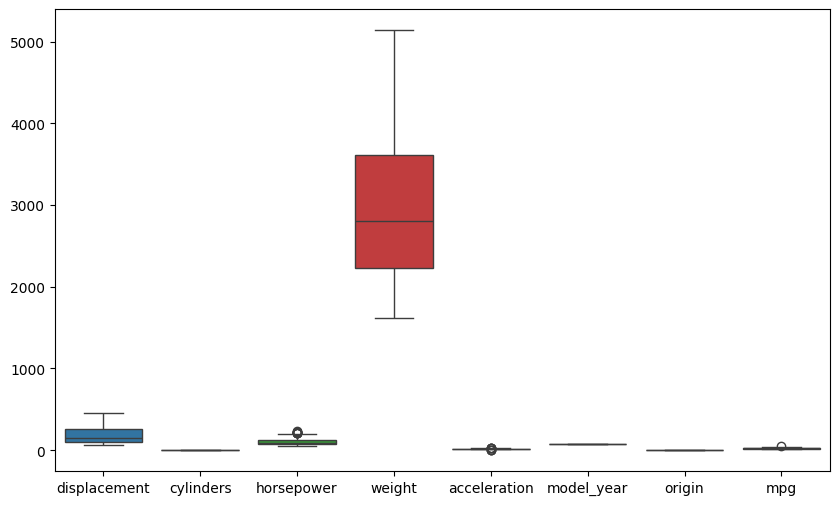

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

Burada sütunların kendilerine özel değerlerinin yayılımında gösterdiği değişkenlik nedeniyle weight dışındaki sütunların dağılımını incelemek neredeyse imkansız olduğundan tüm sütunları ayrı ayrı inceleyebiliriz.

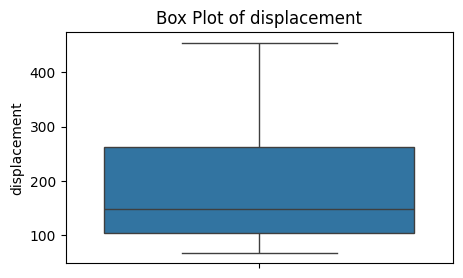

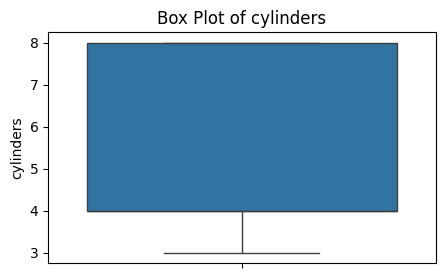

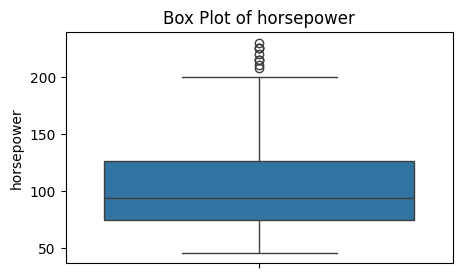

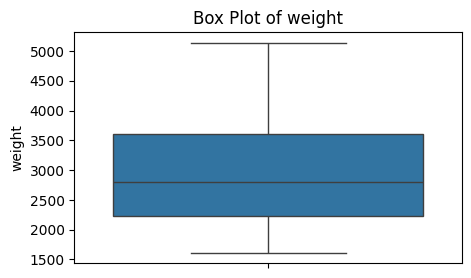

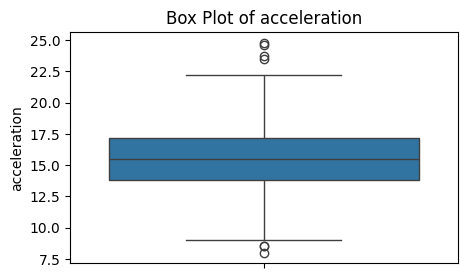

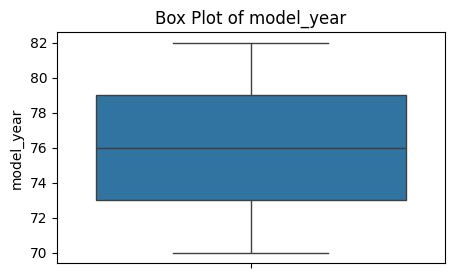

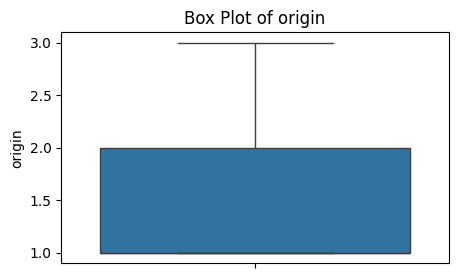

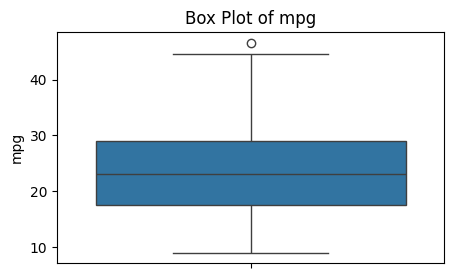

In [122]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()
    print()

Veri setimizin normal dağılıma sahip olup olmadığını da kontrol etmek için bir Shapiro-Wilk testi uygulayalım.
### Shapiro-Wilk Testi

In [123]:
import numpy as np
from scipy import stats

for col in df.columns:
    statistic, p_value = stats.shapiro(df[col])
    print(f"Column: {col}")
    print(f"Shapiro-Wilk Statistic: {statistic:.3f}")
    print(f"p-value: {p_value:.3f}")

    alpha = 0.05  # Önem seviyesi
    if p_value < alpha:
        print(f"Veriler normal dağılımlı DEĞİLDİR (p < {alpha}).")
    else:
        print(f"Veriler normal dağılımlı olabilir (p > {alpha}).")
    print("-" * 20)

Column: displacement
Shapiro-Wilk Statistic: 0.880
p-value: 0.000
Veriler normal dağılımlı DEĞİLDİR (p < 0.05).
--------------------
Column: cylinders
Shapiro-Wilk Statistic: 0.749
p-value: 0.000
Veriler normal dağılımlı DEĞİLDİR (p < 0.05).
--------------------
Column: horsepower
Shapiro-Wilk Statistic: nan
p-value: nan
Veriler normal dağılımlı olabilir (p > 0.05).
--------------------
Column: weight
Shapiro-Wilk Statistic: 0.941
p-value: 0.000
Veriler normal dağılımlı DEĞİLDİR (p < 0.05).
--------------------
Column: acceleration
Shapiro-Wilk Statistic: 0.992
p-value: 0.040
Veriler normal dağılımlı DEĞİLDİR (p < 0.05).
--------------------
Column: model_year
Shapiro-Wilk Statistic: 0.946
p-value: 0.000
Veriler normal dağılımlı DEĞİLDİR (p < 0.05).
--------------------
Column: origin
Shapiro-Wilk Statistic: 0.674
p-value: 0.000
Veriler normal dağılımlı DEĞİLDİR (p < 0.05).
--------------------
Column: mpg
Shapiro-Wilk Statistic: 0.968
p-value: 0.000
Veriler normal dağılımlı DEĞİLDİR (

İstatistiksel testlerin ve modellemelerin güvenilir sonuçlar vermesi için normal dağılım çoğu zaman kritik bir öneme sahiptir. Bu nedenle burada atacağımız ilk adım Z-score normalizasyonu (Z-transformation/standardization) uyguladıktan sonra eksik veri analizi işlemine geçmek olacaktır.
### Aykırı Değerleri Sınıra Çekme

In [124]:
cols_to_transform = ["displacement", "acceleration", "mpg", "horsepower"]

# Winsorization için Q1 ve Q3
alt_sinir = 0.05
ust_sinir = 0.95

# Winsorize işlemi
for col in cols_to_transform:
    lower_limit = df[col].quantile(alt_sinir)
    upper_limit = df[col].quantile(ust_sinir)
    df[col] = np.clip(df[col], lower_limit, upper_limit)

_Not: Aykırı değerleri sınırlandırmanın yaygın bir yoluna **Winsorization** denir._

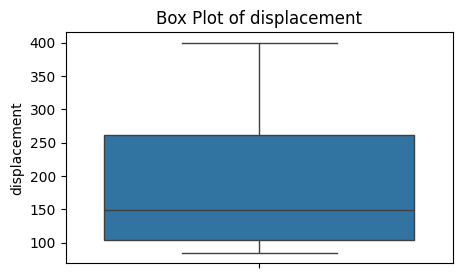

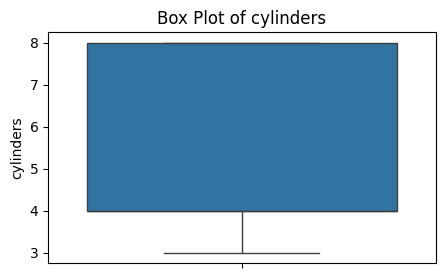

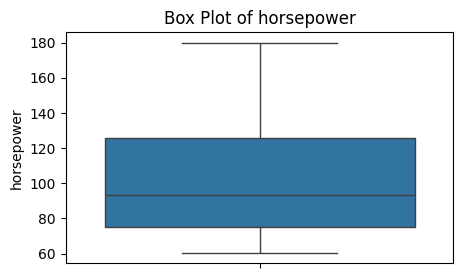

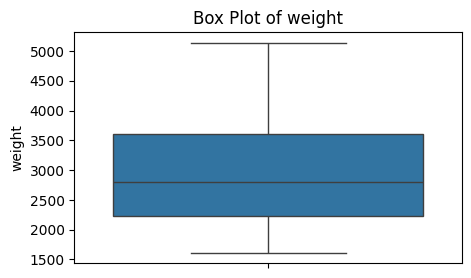

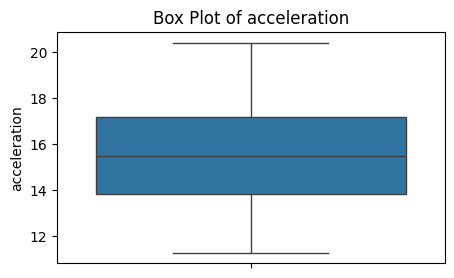

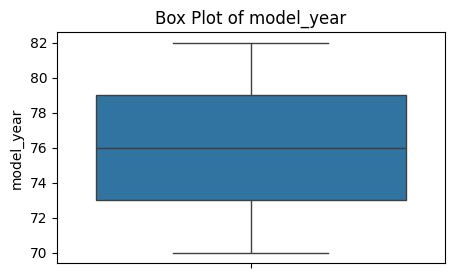

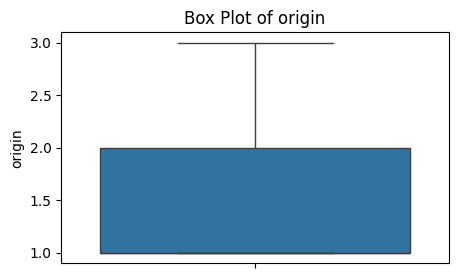

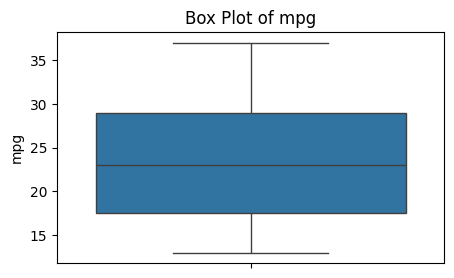

In [125]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()
    print()

Aykırı değerlerimizi sınıra çektikten sonra artık normalizasyon işlemimizi gerçekleştirebiliriz.
## Normalizasyon

In [126]:
from sklearn.preprocessing import StandardScaler

cols_to_normalize = ["displacement", "acceleration", "horsepower"]

scaler = StandardScaler()

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

Normalizasyonumuzu gerçekleştirdik, sayısal sütunlarımızın istatistiksel değerlerini tekrar gözden geçirelim.

In [127]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,3.980000e+02,398.000000,3.920000e+02,398.000000,3.980000e+02,398.000000,398.000000,398.000000
mean,1.785283e-17,5.454774,1.812609e-16,2970.424623,2.320868e-16,76.010050,1.572864,23.403015
std,1.001259e+00,1.701004,1.001278e+00,846.841774,1.001259e+00,3.697627,0.802055,7.349130
min,-1.062693e+00,3.000000,-1.237180e+00,1613.000000,-1.730151e+00,70.000000,1.000000,13.000000
25%,-8.730550e-01,4.000000,-8.218097e-01,2223.750000,-7.004958e-01,73.000000,1.000000,17.500000
50%,-4.371339e-01,4.000000,-2.900203e-01,2803.500000,-2.149104e-02,76.000000,1.000000,23.000000
75%,6.809913e-01,8.000000,6.442044e-01,3608.000000,6.575137e-01,79.000000,2.000000,29.000000
max,2.040474e+00,8.000000,2.196455e+00,5140.000000,1.970932e+00,82.000000,3.000000,37.030000


İstediğimiz görüntüyü elde ettik. Eksik değer analizi ile devam edelim.

## Eksik Değer Analizi

In [128]:
df.isnull().sum()

,0
displacement,0
cylinders,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
mpg,0


Zaten toplamda 6 adet eksik değer olduğunu başta görmüştük, şimdi horsepower sütununu inceleyip uygun bir formatla dolduralım.

In [129]:
df["horsepower"].head()

,horsepower
0,0.759186
1,1.765274
2,1.334093
3,1.334093
4,1.046640


Verimizin, float tipinde olduğunu görüyoruz, mean (ortalama) değeri ile doldurabiliriz.

In [130]:
hp_mean = np.mean(df["horsepower"])

df["horsepower"] = df["horsepower"].fillna(hp_mean)

print(df["horsepower"].isnull().sum())

0


Eksik verimiz kalmadığına göre diğer değişkenlerimizi de inceleyip model eğitimine geçebiliriz. Özellik mühendisliği kısmına girişimizi yapalım.
## Feature Engineering
Tek değişkenli veri görselleştirme yapabiliriz. Örneğin, menşei ülkelere göre mpg (hedef değişken) dağıtımına bakabiliriz.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


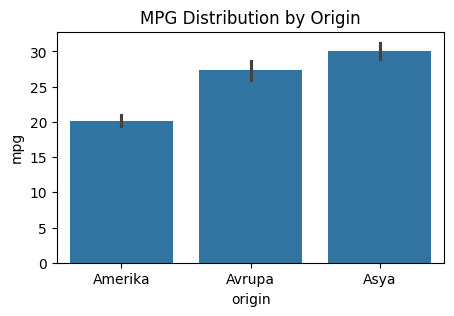

In [132]:
plt.figure(figsize=(5, 3))
sns.barplot(x="origin", y="mpg", data=df)
plt.xticks(ticks=[0, 1, 2], labels=["Amerika", "Avrupa", "Asya"])
plt.title("MPG Distribution by Origin")
plt.show()

Sayılarını bulduk ancak ülkelere göre ortalamaları bulup görselleştirmemiz daha iyi bir yorumlama yapmamıza yardımcı olacaktır.

([<matplotlib.axis.XTick at 0x7be119856a10>,
 [Text(0, 0, 'Amerika'), Text(1, 0, 'Avrupa'), Text(2, 0, 'Asya')])

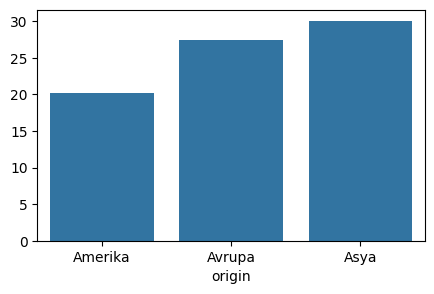

In [133]:
country_mpg = df.groupby("origin")["mpg"].mean()

plt.figure(figsize=(5, 3))
sns.barplot(x=country_mpg.index, y=country_mpg.values)
plt.xticks(ticks=[0, 1, 2], labels=["Amerika", "Avrupa", "Asya"])

Veri setimiz çok büyük olmadığı için çok büyük bir değişiklik olmadı ancak Asya bölgesinde üretilen arabaların daha yüksek MPG değerine sahip olduğunu, yani **Araç Yakıt Tüketim Performansı**nın diğer bölgelere göre daha yüksek olduğunu belirtiyor.

In [134]:
df["origin"].unique()

array([1, 3, 2])

"origin" sütununun Menşei-Ülke değerini temsil ettiğini biliyoruz. Bu nedenle bu sütuna one-hot encoding uygulayarak modelin 1, 2 ve 3 olarak numaralandırılmış ülkelerin birinin diğerinden üstün olduğunu düşünmemesini sağlayabiliriz. Bunu yaparken _**dummy tuzağı**_ na düşmemek ve _**multicollinearity**_ durumunu önlemek adına

```python
    pandas.get_dummies(dataframe, drop_first=True)
```
uygulayacağız.

In [135]:
df = pd.get_dummies(df, columns=["origin"], drop_first=True)
df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,mpg,origin_2,origin_3
0,1.124301,8,0.759186,3504,-1.440307,70,18.0,False,False
1,1.547908,8,1.765274,3693,-1.642995,70,15.0,False,False
2,1.232665,8,1.334093,3436,-1.730151,70,18.0,False,False
3,1.094747,8,1.334093,3433,-1.440307,70,16.0,False,False
4,1.075044,8,1.046640,3449,-1.730151,70,17.0,False,False


Oluşturabileceğimiz/sentezleyebileceğimiz yeni ve anlamlı veri türleri (özellik) olup olmadığını detaylıca inceleyebilmek adına business (iş mantığı) dediğimiz araştırmayı yapmalıyız ve daha iyi bir anlama olması adına ısı haritası (heatmap) oluşturabiliriz.

### Korelasyon Analizi
Bu basamakta daha anlamlı özellikler seçmek için korelasyon analizi yapacağız. Korelasyon matrisini hesaplama ile başlayalım.

In [136]:
correlation_matrix = df.corr()

print(correlation_matrix)

              displacement  cylinders  horsepower    weight  acceleration  \
displacement      1.000000   0.956788    0.900693  0.936396     -0.536004   
cylinders         0.956788   1.000000    0.865360  0.896017     -0.510533   
horsepower        0.900693   0.865360    1.000000  0.880121     -0.681155   
weight            0.936396   0.896017    0.880121  1.000000     -0.425769   
acceleration     -0.536004  -0.510533   -0.681155 -0.425769      1.000000   
model_year       -0.368921  -0.348746   -0.409148 -0.306564      0.272241   
mpg              -0.825406  -0.792686   -0.798951 -0.843846      0.409974   
origin_2         -0.378391  -0.352861   -0.280913 -0.298843      0.175336   
origin_3         -0.434268  -0.396479   -0.335747 -0.440817      0.123406   

              model_year       mpg  origin_2  origin_3  
displacement   -0.368921 -0.825406 -0.378391 -0.434268  
cylinders      -0.348746 -0.792686 -0.352861 -0.396479  
horsepower     -0.409148 -0.798951 -0.280913 -0.335747  
w

Korelasyon matrisini daha iyi anlamak için heatmap kullanarak görselleştirme yapalım.

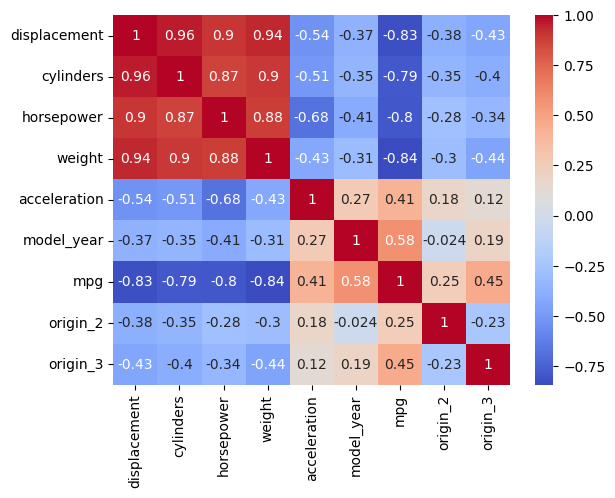

In [137]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Heatmap'i incelediğimizde sadece ilk satıra bakarak bile displacement ile cylinders, horsepower, weight ve mpg sütunlarının yüksek korelasyon gösterdiğini rahatlıkla söyleyebiliriz. Bu durumda, aralarında bu kadar yüksek korelasyon olan değişkenlerden biri kaldırdığımız zaman aslında çok büyük bir sorun yaşamayacağımızı ve modelin aslında daha kolay eğitileceğini (özellik sayısı azaldığından dolayı-dimensionality reduction) göreceğiz.

Birkaç adet yeni özellik ekleyip model performansımızı nasıl etkilediğini inceleyebiliriz. Bu nedenle yeni özellikleri yeni dataframe (df_copy) üzerine ekleyeceğiz.
1. Power-to-Weight Ratio (Beygir Gücü / Ağırlık Oranı)

Aracın gücünü ve ağırlığını dikkate alarak performans hakkında bir gösterge sunar.

In [138]:
df_copy = df.copy()

df_copy["power_to_weight_ratio"] = df_copy["horsepower"] / df_copy["weight"]

2. Engine Size-to-Weight Ratio (Motor Hacmi / Ağırlık Oranı)

Motor hacminin aracın ağırlığına oranı, aracın genel performansını belirlemede yardımcı olabilir.

In [139]:
df_copy["engine_size_to_weight_ratio"] = df_copy["displacement"] / df_copy["weight"]

3. Horsepower-to-Displacement Ratio (Beygir Gücü / Motor Hacmi Oranı)

Motorun gücünü ve hacmini kıyaslayarak motor verimliliği hakkında bilgi verir.

In [140]:
df_copy["horsepower_to_displacement_ratio"] = df_copy["horsepower"] / df_copy["displacement"]

4. Age of Car (Aracın Yaşı)

Aracın yaşı, eskimiş araçların yakıt verimliliği açısından etkili olabileceği için önemli olabilir.

In [141]:
df_copy["age_of_car"] = 2023 - df_copy["model_year"]

df_copy için yeni bir heatmap oluşturup korelasyonlara bakalım.

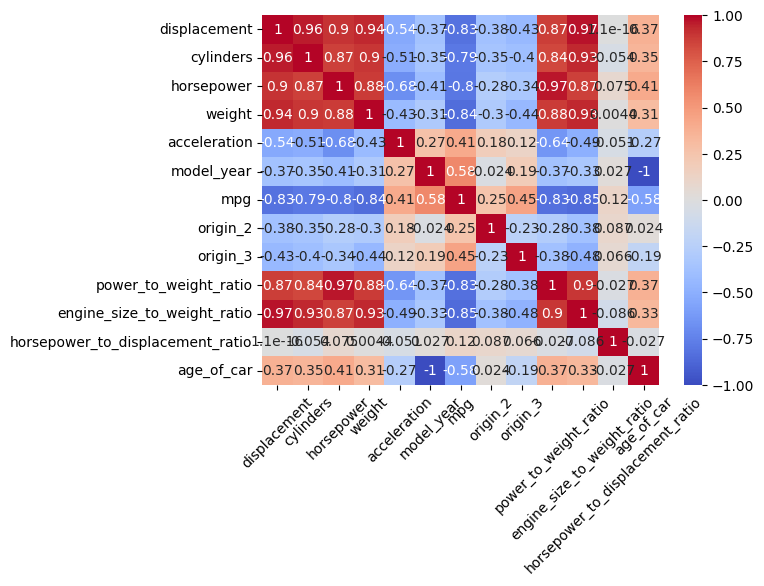

In [142]:
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

Şimdi daha yüksek performans alabileceğimiz, orta değerli korelasyona sahip özellikler sentezledik ve verilerimizle modelimizi eğitebiliriz.

## Modelleme
Bu basamakta modelimizi oluşturuyor ve eğitiyor olacağız. Veri setimizi 80-20 eğitim ve test olarak ayırma ile başlayalım.

In [143]:
# Veriyi ayırma
from sklearn.model_selection import train_test_split

X = df.drop("mpg", axis=1)
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Model oluşturma
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train) # Normalde X_train_scaled ve X_test_scaled kullanılır

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [145]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 2.1522598673707853
MSE: 7.043373075431414
RMSE: 2.6539353939821924
R²: 0.8543817108173971


Şimdi metrik sonuçlarımızı kıyaslayabiliriz.
- MSE (7.04) hataların karesinin ortalaması olduğu için MAE veya RMSE ile doğrudan kıyaslanamaz. Çünkü birimi farklıdır ve yorumlaması daha zordur. Bu yüzden hataların genel büyüklüğünü anlamak için RMSE’ye bakmak daha mantıklıdır.

- MAE (2.15) ve RMSE (2.65) kıyaslandığında, RMSE’nin biraz daha yüksek olduğunu görüyoruz. Bunun sebebi, RMSE’nin büyük hatalara daha fazla duyarlı olması. Aradaki fark, modelimizin bazı tahminlerde daha büyük sapmalar yapabildiğini gösteriyor.

- R²’nin 0.85 olması, modelimizin verideki değişkenliğin %85’ini açıkladığını gösteriyor. Yani modelimiz genel olarak iyi çalışıyor, ancak hala iyileştirme payı var.

Genel olarak, modelimiz güçlü bir performans sergiliyor ama büyük hataları azaltarak daha dengeli hale getirebiliriz.

## Model Performansını Artırma
Performansı artırmak için kullanabileceğimiz bazı Hyperparameter Optimization yöntemleri şunları içermektedir:
1. **Cross-Validation (Çapraz Doğrulama)**: Çapraz doğrulama, modelimizin genelleme yeteneğini değerlendirmek için kullanılır. Veri setinizi birden fazla parçaya (fold) böler ve her bir parçayı bir kez test seti olarak kullanarak modelimizi eğitir ve test eder. Bu, modelin farklı veri alt kümelerinde nasıl performans gösterdiğini görmenizi sağlar ve overfitting riskini azaltır.
2. **Grid Search (Grid arama)**: Grid search, modelimizin hiperparametrelerini optimize etmek için kullanılır. Farklı hiperparametre kombinasyonlarını deneyerek en iyi performansı veren kombinasyonu bulur.

In [146]:
from sklearn.model_selection import cross_val_score

# 5 parçalı bir çapraz doğrulama uygulayalım. (5-fold cross-validation)
scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')

print("Cross-validation scores:", scores)

print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.51691153 0.70775858 0.81850928 0.69826506 0.2512253 ]
Average cross-validation score: 0.5985339510834974


In [147]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='r2')

grid_search.fit(X, y)

print("Best hyperparameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

Best hyperparameters: {'copy_X': True, 'fit_intercept': False, 'positive': False}
Best score: 0.6369875439804149


GridSearchCV daha büyük ve kompleks veri setlerinde daha iyi performans göstereceğinden ötürü burada cross-validation ile devam edeceğiz.

## df_copy Modelleme
df_copy sentezlenen değişkenleri de içerdiğinden dolayı iki modeli de ayrı ayrı değerlendireceğiz.

In [148]:
# Veriyi ayırma
from sklearn.model_selection import train_test_split

X_copy = df_copy.drop("mpg", axis=1)
y_copy = df_copy["mpg"]

X_copy_train, X_copy_test, y_copy_train, y_copy_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

In [149]:
# Model oluşturma

lr = LinearRegression()

lr.fit(X_copy_train, y_copy_train)

y_copy_pred = lr.predict(X_copy_test)

mae = mean_absolute_error(y_copy_test, y_copy_pred)
mse = mean_squared_error(y_copy_test, y_copy_pred)
r2 = r2_score(y_copy_test, y_copy_pred)
rmse = np.sqrt(mse)

In [150]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1.7784670809574272
MSE: 5.262728946255187
RMSE: 2.2940638496465584
R²: 0.8911956562036147


Gördüğümüz üzere genel olarak hata oranlarını düşürüp R² değerini yükseltmeyi başardık! Şimdi bu modeli .joblib formatında kaydedebiliriz.

### Modelin Son Hali (.joblib formatında)

In [151]:
from joblib import dump

# Modeli kaydetme
dump(lr,'/content/drive/MyDrive/autompg_linear_reg_ozlem.joblib')

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!
